# OSM API

https://wiki.openstreetmap.org/wiki/Osmapi

https://github.com/metaodi/osmapi

In [4]:
import osmapi as osm
#from PIL import Image
import requests
from io import BytesIO

https://www.openstreetmap.org/query?lat=47.3777&lon=8.5396

In [5]:
api = osm.OsmApi() # this instantiate the OsmApi class - do you need to authorise?
node = api.NodeGet('486334775')
#relation = api.RelationGet('9310116')

In [9]:
#node
#relation

In [9]:
# Visualization of attributes
response = requests.get(node['tag']['image'])
img = Imresponseage.open(BytesIO(response.content))

KeyError: 'image'

# OSMPythonTools

https://github.com/mocnik-science/osm-python-tools

## Example 1

_Which object does the way with the id 5887599 represent?_

In [1]:
from OSMPythonTools.api import Api
api = Api()
way = api.query('way/5887599')

In [6]:
print(way.tag('building'))
print(way.tag('architect'))
print(way.tag('website'))

castle
Johann Lucas von Hildebrandt
https://www.belvedere.at/


## Example 2

_What is the English name of the church called ‘Stephansdom’, what address does it have, and which of which denomination is the church?_

In [19]:
from OSMPythonTools.overpass import Overpass
overpass = Overpass()
result = overpass.query('way["name"="Stephansdom"]; out body;')

In [24]:
len([elem for elem in result.elements()])

1

In [25]:
stephansdom = result.elements()[0]

In [26]:
print(stephansdom.tag('name:en'))
print('%s %s, %s %s' % (stephansdom.tag('addr:street'), stephansdom.tag('addr:housenumber'), stephansdom.tag('addr:postcode'), stephansdom.tag('addr:city')))
print(stephansdom.tag('building'))
print(stephansdom.tag('denomination'))

Saint Stephen's Cathedral
Stephansplatz 3, 1010 Wien
cathedral
roman_catholic


## Example 3

_How many trees are in the OSM data of Vienna? And how many trees have there been in 2013?_

In [7]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()
#areaId = nominatim.query('Russia').areaId()

In [8]:
areaId

3600109166

In [9]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

overpass = Overpass()

query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')

result = overpass.query(query, timeout=60)

result.countElements()

141748

In [15]:
print (result.elements())

None


In [4]:
result = overpass.query(query, date='2013-01-01T00:00:00Z', timeout=60)
result.countElements()

127690

## Example 4

_Where are waterbodies located in Vienna?_

In [16]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
areaId = nominatim.query('Vienna, Austria').areaId()

In [17]:
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
overpass = Overpass()
query = overpassQueryBuilder(area=areaId, elementType=['way', 'relation'], selector='"natural"="water"', includeGeometry=True)
result = overpass.query(query, timeout=60)

In [18]:
firstElement = result.elements()[0]
firstElement.geometry()

{"coordinates": [[[16.498671, 48.27628], [16.4991, 48.276345], [16.499181, 48.276314], [16.499226, 48.276281], [16.499257, 48.276241], [16.499258, 48.276121], [16.499112, 48.275847], [16.499063, 48.275695], [16.498993, 48.275574], [16.498807, 48.275361], [16.498701, 48.275209], [16.498407, 48.274805], [16.498273, 48.274666], [16.497395, 48.273634], [16.49734, 48.273462], [16.497235, 48.273291], [16.497035, 48.273058], [16.496515, 48.272456], [16.496426, 48.272255], [16.496268, 48.272081], [16.49602, 48.271804], [16.495863, 48.271648], [16.49581, 48.271527], [16.495374, 48.270954], [16.495014, 48.270454], [16.494752, 48.27011], [16.494612, 48.269982], [16.494456, 48.269822], [16.494078, 48.269674], [16.493853, 48.269678], [16.493247, 48.269762], [16.492604, 48.26991], [16.492203, 48.269956], [16.491743, 48.27001], [16.490983, 48.270095], [16.490779, 48.270151], [16.490071, 48.270256], [16.489984, 48.270273], [16.489959, 48.270309], [16.489959, 48.270352], [16.490005, 48.270461], [16.490

## Example 5

_How did the number of trees in Berlin, Paris, and Vienna change over time?_

In [5]:
from collections import OrderedDict
from OSMPythonTools.data import Data, dictRangeYears, ALL
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass

In [6]:
dimensions = OrderedDict([
    ('year', dictRangeYears(2013, 2017.5, 1)),
    ('city', OrderedDict({
        'berlin': 'Berlin, Germany',
        'paris': 'Paris, France',
        'vienna': 'Vienna, Austria',
    })),
])

In [7]:
overpass = Overpass()
def fetch(year, city):
    areaId = nominatim.query(city).areaId()
    query = overpassQueryBuilder(area=areaId, elementType='node', selector='"natural"="tree"', out='count')
    return overpass.query(query, date=year, timeout=120).countElements()
data = Data(fetch, dimensions)

[nominatim] downloading data: search
[overpass] downloading data: [timeout:120][date:"2013-01-01T00:00:00Z"][out:json];area(3600062422)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;
[nominatim] downloading data: search
[overpass] downloading data: [timeout:120][date:"2013-01-01T00:00:00Z"][out:json];area(3600007444)->.searchArea;(node["natural"="tree"](area.searchArea);); out count;


Exception: [overpass] could not fetch or interpret status of the endpoint

In [ ]:
data.plot(city=ALL, filename='example4.png')

In [ ]:
data.select(city=ALL).getCSV()

# One more example with Overpass_API

https://wiki.openstreetmap.org/wiki/Overpass_API

https://medium.com/better-programming/how-to-get-open-street-and-map-data-using-python-2b777bf5af14

`node["amenity"="cafe"]({{bbox}}); out;`

`node["amenity"="pub"](53.2987342,-6.3870259,53.4105416,-6.1148829); out;
`

`( node["amenity"="cafe"]({{bbox}});
  way["amenity"="cafe"]({{bbox}});
  relation["amenity"="cafe"]({{bbox}});
);
out;`

`area["ISO3166-1"="GB"][admin_level=2];
node["place"="city"](area);
out;`

In this case, area IDs need to be derived from an existing OSM way by adding `2400000000` to its OSM ID, or, in case of relation, by adding `3600000000`

`area(3600062149);
node["place"="city"](area);
out;`

The first set of values can control the verbosity or the detail of information of the output, such as `ids`, `skel`, `body`(default value), `tags`, `meta`, and `count`

For more information please follow the link: https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL

In [5]:
import requests
import json
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query}, timeout=60)
data = response.json()

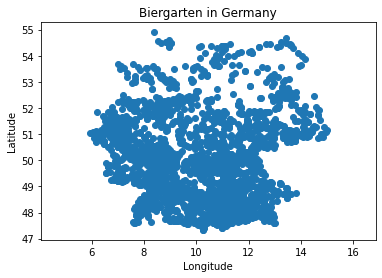

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [8]:
import overpy
api = overpy.Overpass()
r = api.query("""
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
""")
coords  = []
coords += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]
coords += [(float(way.center_lon), float(way.center_lat)) 
           for way in r.ways]
coords += [(float(rel.center_lon), float(rel.center_lat)) 
           for rel in r.relations]

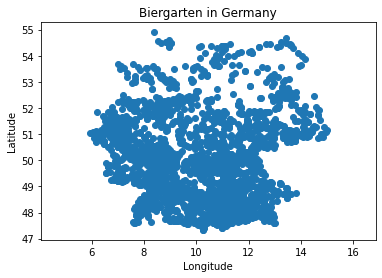

In [9]:
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()